In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

    
    

In [13]:
n, d, H =64, 1000, 100
x=tf.placeholder(tf.float32, shape=(n, d))
y=tf.placeholder(tf.float32, shape=(n, d))
w1=tf.placeholder(tf.float32, shape=(d, H))
w2=tf.placeholder(tf.float32, shape=(H, d))

h=tf.maximum(tf.matmul(x,w1),0)
y_pred=tf.matmul(h,w2)
diff=y_pred-y
loss=tf.reduce_mean(tf.reduce_sum(diff**2,axis=1))
grad_w1, grad_w2=tf.gradients(loss,[w1,w2])



In [14]:
with tf.Session() as sess:
    values = {
        x: np.random.randn(n, d),
        w1: np.random.randn(d, H),
        w2: np.random.randn(H, d),
        y: np.random.randn(n, d),
    }
    out=sess.run([loss, grad_w1, grad_w2 ],feed_dict=values)
    loss_val, grad_w1_val, grad_w2_val = out
    print(out)

[51708136.0, array([[  2102.661  ,  -4821.6694 ,   -857.9868 , ...,   -664.67596,
          -313.58582,  -3317.3218 ],
       [-10375.58   , -10418.0205 ,   5804.837  , ...,  -1400.1492 ,
         -7396.744  ,   3464.1235 ],
       [  3248.5725 ,   8064.26   ,   2509.906  , ...,   4436.066  ,
          1302.6635 ,  10668.78   ],
       ...,
       [  6105.006  ,  -6724.0596 ,  -3695.7275 , ...,    257.7393 ,
         -2333.9832 ,   6423.163  ],
       [ -9225.953  ,  -6002.257  ,  -4406.38   , ...,    807.1233 ,
         -1106.814  ,   1684.9213 ],
       [  8625.585  ,  -7408.3276 ,   4454.4077 , ...,   3133.8586 ,
          4784.76   ,  -2722.006  ]], dtype=float32), array([[-11789.503  ,    515.4127 ,  -1901.1317 , ...,   8007.798  ,
         -1503.9869 ,   2779.0024 ],
       [ -9302.678  ,   2276.5903 ,  -1519.0604 , ...,   7383.941  ,
          -791.34033,   -303.86163],
       [-10583.683  ,    533.8121 ,  -4656.9707 , ...,   7117.014  ,
          -660.98724,   -892.05133],
    

In [27]:
np.random.randn(n, d)

array([[-0.52809668,  1.70509929,  1.8691161 , ...,  0.0130247 ,
         0.85021878, -1.24044352],
       [ 1.12014176,  1.54849165,  1.40306113, ..., -1.30520241,
         1.18505096,  0.53183311],
       [ 0.90232167,  0.68982926,  0.45401618, ..., -1.0124697 ,
        -1.66943004, -0.38202709],
       ...,
       [ 0.17187122,  1.23435164,  0.87666106, ...,  0.13734967,
         0.5513156 , -0.40730531],
       [ 0.74684412,  0.47367077,  0.63705554, ..., -0.9287613 ,
         0.62968042, -0.8887659 ],
       [ 0.62374901, -1.5314664 ,  1.3538418 , ...,  0.27235884,
        -1.45837411,  2.68387367]])

In [37]:
print(w1)

Tensor("Placeholder_66:0", shape=(1000, 100), dtype=float32)


In [42]:
d

1000

In [43]:
h

<tf.Tensor 'Maximum_13:0' shape=(64, 100) dtype=float32>

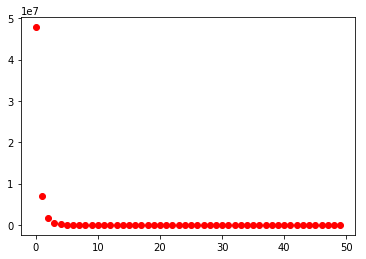

47844730.0 984.5895


In [18]:
with tf.Session() as sess:
    values = {
        x: np.random.randn(n, d),
        w1: np.random.randn(d, H),
        w2: np.random.randn(H, d),
        y: np.random.randn(n, d),}
    learning_rate =1e-5
    loss_summary=[]
    steps=50
    for t in range(steps):
        out = sess.run([loss, grad_w1, grad_w2],feed_dict=values)
        loss_val, grad_w1_val, grad_w2_val = out
        values[w1] -= learning_rate * grad_w1_val
        values[w1] -= learning_rate * grad_w1_val
        loss_summary.append(loss_val)
    plt.plot(range(steps), loss_summary, 'ro',label='loss_value')
    plt.show()
    print(loss_summary[0],loss_summary[steps-1])